<a href="https://colab.research.google.com/github/Harshalkumar96/EDA_Hotel_Booking_Analysis_-Capstone_Project-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

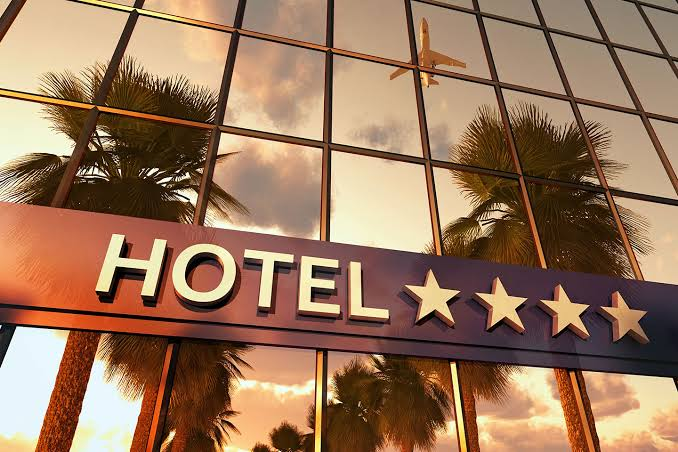

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings 
filterwarnings ('ignore')


In [4]:
# Mounting Google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Reading .csv file 
path = ('/content/drive/MyDrive/Capstone Projects csv/Hotel Bookings.csv')
df = pd.read_csv(path)

# Data Exploration

In [31]:
# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')


In [38]:
# First 5 rows of dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
# Number of rows & columns in dataset 
df.shape

(119390, 32)

In [14]:
print('Our Dataset having {0} rows and {1} columns in it.'.format(df.shape[0] , df.shape[1]))

Our Dataset having 119390 rows and 32 columns in it.


In [15]:
# Information about numerical columns in dataset = mean values , min,max values.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
# NaN values below shows us that those are non numerical columns (categorical data)
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [18]:
# below we can see non-null entries & Datatype of each respective column
# object means string(str) datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

So we have **4 float columns**, **16 int columns** & **12 str type columns** 

In [19]:
# Columns in dataset 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
# column names list
print('we have these columns in our dataset =>' + '\033[1m' + '{0}'.format(str(df.columns)) + '\033[0m')

we have these columns in our dataset =>Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [27]:
# Making copy of our dataset 
df2 = df.copy()